In [1]:
import pandas as pd

In [2]:
test = pd.read_csv('../Test Data/most-recent-event.csv')

In [3]:
test.head(3)

R_fighter        B_fighter  R_odds  B_odds        R_ev        B_ev  \
0  Jared Cannonier  Kelvin Gastelum    -145     125   68.965517  125.000000   
1       Clay Guida      Mark Madsen     150    -170  150.000000   58.823529   
2    Parker Porter    Chase Sherman     170    -200  170.000000   50.000000   

         date                location country Winner  ...  finish_details  \
0  2021-08-21  Las Vegas, Nevada, USA     USA    Red  ...             NaN   
1  2021-08-21  Las Vegas, Nevada, USA     USA   Blue  ...             NaN   
2  2021-08-21  Las Vegas, Nevada, USA     USA    Red  ...             NaN   

  finish_round finish_round_time  total_fight_time_secs  r_dec_odds  \
0            5              5:00                   1500         300   
1            3              5:00                    900         275   
2            3              5:00                    900         450   

   b_dec_odds  r_sub_odds  b_sub_odds  r_ko_odds  b_ko_odds  
0         240        1000        1100        175        600  
1         120         900         600        700        700  
2         300         900        1600        500        120  

[3 rows x 119 columns]

In [4]:
features = test.loc[:, 
    [
        "B_odds", "R_odds", "B_ev", "R_ev", "b_dec_odds", "r_dec_odds",
        "b_ko_odds", "r_ko_odds", "b_sub_odds", "r_sub_odds", "Winner"
    ]
]

In [5]:
X_test = features.drop("Winner", axis=1)

In [6]:
y_test = test.loc[:, "Winner"]

In [7]:
from joblib import load

In [8]:
rfc_model = load('../Model and Scaler/final_rfc.joblib')

In [14]:
predictions = rfc_model.predict(X_test)

In [15]:
probabilities = rfc_model.predict_proba(X_test)

In [16]:
predictions

array(['Red', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Blue', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix

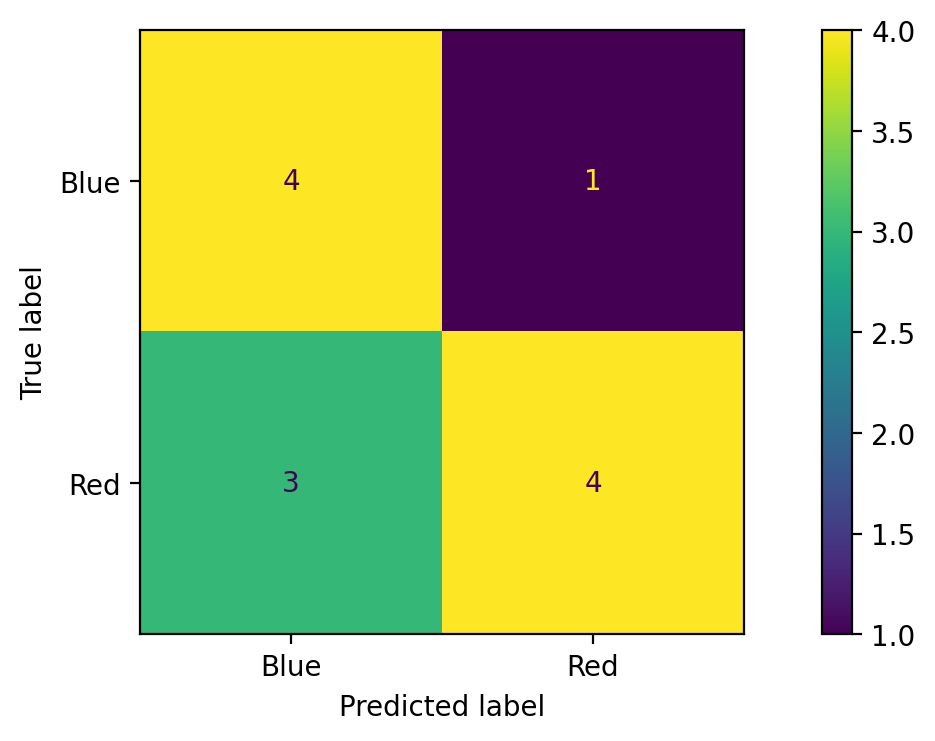

In [12]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
plot_confusion_matrix(model, X_test, y_test, ax=ax)

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        Blue       0.57      0.80      0.67         5
         Red       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.69      0.69      0.67        12
weighted avg       0.70      0.67      0.67        12

